In [1]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install git+https://github.com/garrettj403/SciencePlots.git
plt.style.use(['science', 'notebook', 'vibrant'])
%matplotlib inline
import sys
sys.path.append("./src/")
import MPS, MODEL, DMRG
from auxiliary import dmrg_gs, correlation_function, save_dict, load_dict
import pickle
# save_dict(g_data, './data.pkl')
# g_data2 = load_dict('./data.pkl')
%load_ext autoreload
%autoreload 2
sx = np.array([[0., 1.], [1., 0.]])
sy = np.array([[0., -1j], [1j, 0.]])
sz = np.array([[1., 0.], [0., -1.]])
Ls = [8, 16, 34, 64]

## Data generations

DO NOT RUN THIS CELL IF NOT NECESSARY

DATA ARE PRE-GENERATED AND STORED IN data/entropies or data/models

In [ ]:
# J1-J2 Base Model
# Notice: Define g = J2/J1
# For g=0, we obtain an isotropic Heisenberg XXX model.

# Ferromagnetic
Ls = [8, 16, 32, 64]
Ss = {}
psiL64 = {}
gs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
for g in gs:
    print("J2/J1= ", g)
    psiL64[g] = []
    Ss[g] = []
    for L in Ls:
        model = MODEL.J1J2Model(L=L, J1=-1., J2=g)
        print("L =", L)
        model, psi = dmrg_gs(model, max_N_sweeps=30, chi_max=50, eps=1.e-5)
        Ss[g].append(psi.entanglement_entropy()[L//2])
        if L == 64:
            psiL64[g].append(psi)
save_dict(psiL64, 'data/models/J1J2_ferro') 
save_dict(Ss, 'data/entropies/J1J2_ferro')
J1J2_ferro = Ss

# Antiferromagnetic
Ls = [8, 16, 32, 64]
Ss = {}
psiL64 = {}
gs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
for g in gs:
    print("J2/J1= ", g)
    psiL64[g] = []
    Ss[g] = []
    for L in Ls:
        model = MODEL.J1J2Model(L=L, J1=1., J2=g)
        print("L =", L)
        model, psi = dmrg_gs(model, max_N_sweeps=30, chi_max=50, eps=1.e-5)
        Ss[g].append(psi.entanglement_entropy()[L//2])
        if L == 64:
            psiL64[g].append(psi)
save_dict(psiL64, 'data/models/J1J2_antiferro') 
save_dict(Ss, 'data/entropies/J1J2_antiferro')
J1J2_antiferro = Ss

In [ ]:
# Exponentially Decaying Interacting (EDI) Model

# Ferromagnetic
Ls = [8, 16, 32, 64]
Ss = {}
psiL64 = {}
xis = [0.01, 0.1, 1.3, 1.4, 1.5, 2.0, 3.0, 4.0, 5.0, 10, 1e2, 1e3, 1e4]
for xi in xis:
    print("xi= ", xi)
    psiL64[xi] = []
    Ss[xi] = []
    for L in Ls:
        model = MODEL.LRHModel(L=L, J=-1., xi=xi)
        print("L =", L)
        model, psi = dmrg_gs(model, max_N_sweeps=20, chi_max=50, eps=1.e-5)
        Ss[xi].append(psi.entanglement_entropy()[L//2])
        if L == 64:
            psiL64[xi].append(psi)
save_dict(psiL64, 'data/models/LRH_ferro')      
save_dict(Ss, 'data/entropies/LRH_ferro')
LRH_ferro = Ss

# Antiferromagnetic
Ls = [8, 16, 32, 64]
Ss = {}
psiL64 = {}
xis = [0.01, 0.1, 1.3, 1.4, 1.5, 2.0, 3.0, 4.0, 5.0, 10, 1e2, 1e3, 1e4]
for xi in xis:
    print("xi= ", xi)
    psiL64[xi] = []
    Ss[xi] = []
    for L in Ls:
        model = MODEL.LRHModel(L=L, J=1., xi=xi)
        print("L =", L)
        model, psi = dmrg_gs(model, max_N_sweeps=20, chi_max=50, eps=1.e-5)
        Ss[xi].append(psi.entanglement_entropy()[L//2])
        if L == 64:
            psiL64[xi].append(psi)
save_dict(psiL64, 'data/models/LRH_antiferro')      
save_dict(Ss, 'data/entropies/LRH_antiferro')
LRH_antiferro = Ss

## Entropy

In [2]:
S_J1J2_antiferro = load_dict('data/entropies/J1J2_antiferro')

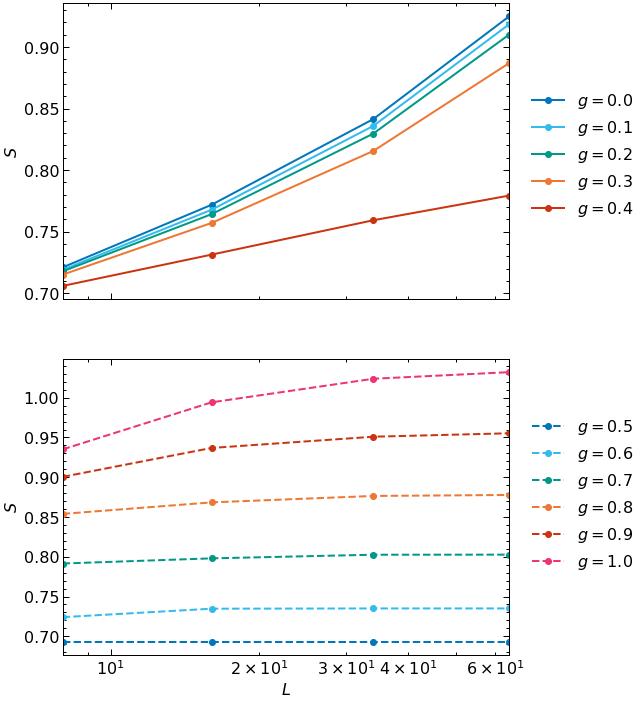

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(8,12), sharex=True)
for g in sorted(S_J1J2_antiferro.keys()):
    if g < 0.5:
        axs[0].plot(Ls, S_J1J2_antiferro[g], marker='o', label=r"$g={g:.1f}$".format(g=g))
    if g >= 0.5:
        axs[1].plot(Ls, S_J1J2_antiferro[g], 'o--', label=r"$g={g:.1f}$".format(g=g))
plt.xscale('log')
axs[1].set_xlabel('$L$')
axs[0].set_ylabel('$S$')
axs[1].set_ylabel('$S$')
axs[0].legend()
axs[0].legend(loc='best',bbox_to_anchor=(1.02, 0.75))
axs[1].legend(loc='best',bbox_to_anchor=(1.02, 0.85))
plt.xlim(8,64)
plt.savefig('plot/J1J2_entropy.png', dpi=120, transparent=True)

In [4]:
LRH_antiferro = load_dict('data/entropies/LRH_antiferro')

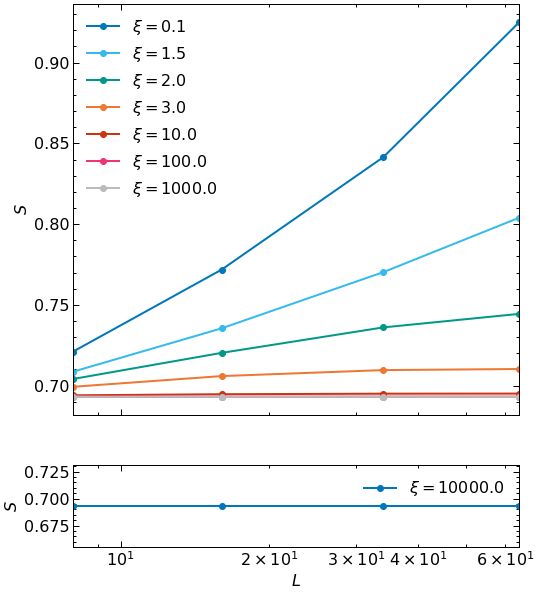

<Figure size 576x432 with 0 Axes>

In [5]:
fig, axs = plt.subplots(
        nrows=2, ncols=1, sharex=True, sharey=False, figsize=(8,10),
        gridspec_kw={'height_ratios':[10,2]}
        )

plt.figure(figsize=(8, 6))
for xi in sorted(LRH_antiferro.keys()):
    if xi in [0.1, 1.5, 2.0, 3.0, 10, 100, 1000]:
        axs[0].plot(Ls, LRH_antiferro[xi], marker='o', label=r"$\xi={xi:.1f}$".format(xi=xi))
    if xi in [1e4]:
        axs[1].plot(Ls, LRH_antiferro[xi], marker='o', label=r"$\xi={xi:.1f}$".format(xi=xi))
axs[0].set_xscale('log')
axs[0].set_xlim(8,64)
axs[1].set_xlim(8,64)
axs[1].set_xscale('log')
axs[1].set_xlabel('$L$')
axs[0].set_ylabel('$S$')
axs[1].set_ylabel('$S$')
axs[0].legend()
axs[0].legend(loc='best')
axs[1].legend(loc='best')
plt.show()
fig.savefig('plot/EDI_entropy.png', dpi=120, transparent=True)

## Correlation

In [6]:
# calculate correlations
def cal_correlation(psis, L=100):
    corrs = {}
    conn_corrs = {}
    for xi in psis.keys():
        psi = psis[xi][0]
        corr = correlation_function(psi, sz, sz, 0)
        corrs[xi] = corr
        exp_val = psi.site_expectation_value(sz)[0:]
        connected_corr = corr[:] - exp_val[0]* exp_val[:]
        print("<Sx> =", exp_val[0])
        conn_corrs[xi] = connected_corr
    return corrs, conn_corrs

In [7]:
# plot the correlations
def fit_conn_corr(corrs):
    xis = [0.1, 1.5, 2.0, 3.0, 4.0, 10, 1e2, 1e3]
    zetas_fit = []
    plt.figure(figsize=(15, 10))
    for xi in xis:
        C = np.abs(conn_corrs[xi])
        log_C = np.log(C)
        x = np.arange(len(log_C))
        include_to_fit = np.logical_and(C > 1.e-12, np.logical_and(x > 5, x < len(C)-10))
        pol = np.polyfit(x[include_to_fit], log_C[include_to_fit], 1)
        slope, const = pol
        fit = np.exp(slope*x + const)
        plt.plot(x, fit, 'k--')
        zetas_fit.append(-1./slope)
        plt.plot(np.abs(conn_corrs[xi]), label=r"$\xi$={xi:.2f}".format(xi=xi))

    plt.xlabel("$r$")
    plt.ylabel(r"$\langle S^z_{i} S^x_{i+r}\rangle$")
    plt.legend(loc='right')
    plt.yscale("log")
    plt.xlim(1,62)
    plt.ylim(1e-10, 1)
    plt.show()
    return zetas_fit

In [8]:
psis_b50_L32= load_dict('data/models/psis_b50_L32')
psis_b50_L64 = load_dict('data/models/psis_b50_L64')
psis_b50_L100 = load_dict('data/models/psis_b50')

<Sx> = -8.532282343431952e-07
<Sx> = -1.0965022068099017e-07
<Sx> = -0.0002181865007135353
<Sx> = 5.978385799854102e-06
<Sx> = -0.00015994805504321308
<Sx> = -9.962041805411381e-05
<Sx> = -1.2884413291835983e-07
<Sx> = -4.6480669313453404e-10
<Sx> = -4.89386309254769e-13


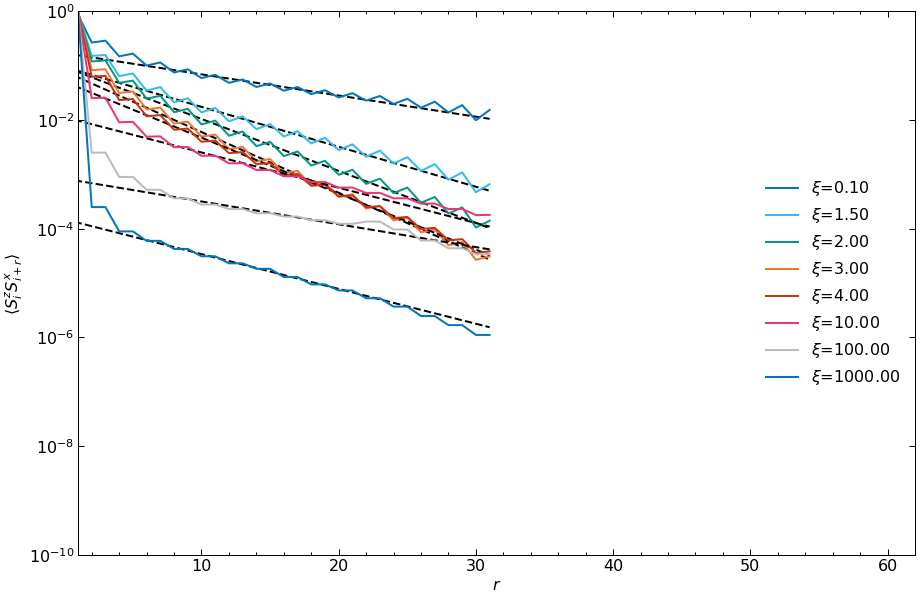

In [9]:
corrs, conn_corrs = cal_correlation(psis_b50_L32)
zeta_fit_b50_L32 = fit_conn_corr(conn_corrs)

<Sx> = -0.00023205302764356395
<Sx> = -3.95170371270126e-06
<Sx> = -2.3136475435503456e-07
<Sx> = -1.7621491289060431e-07
<Sx> = -6.667758631506704e-06
<Sx> = -1.817556591027225e-05
<Sx> = -1.5716140953636604e-06
<Sx> = -2.805422560925308e-12


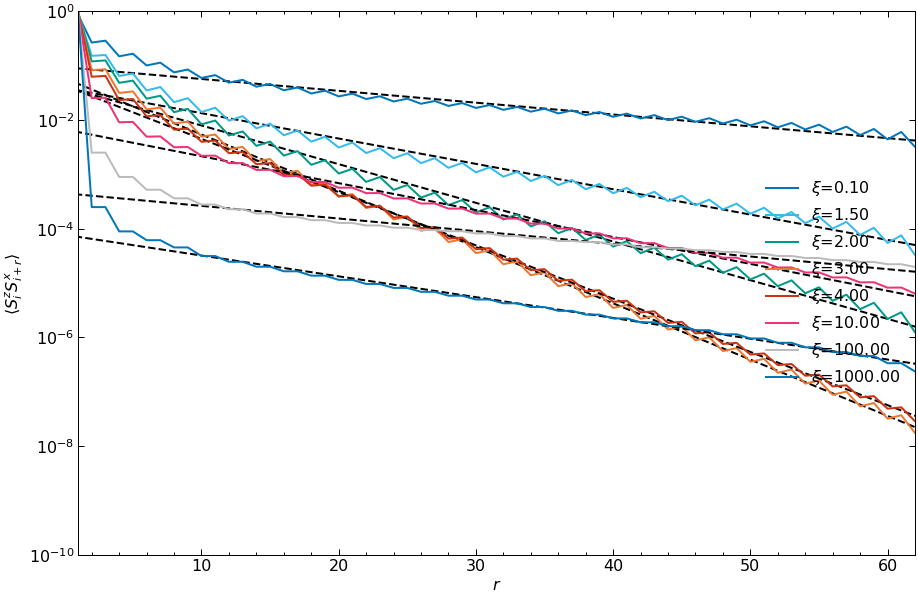

In [10]:
corrs, conn_corrs = cal_correlation(psis_b50_L64)
zeta_fit_b50_L64 = fit_conn_corr(conn_corrs)

<Sx> = -0.0026691763300155658
<Sx> = -1.4653695397860711e-05
<Sx> = -2.436856478271743e-07
<Sx> = -1.7828771914363273e-07
<Sx> = -6.6678457457808316e-06
<Sx> = -2.9544430126815513e-06
<Sx> = 2.082544414694354e-10
<Sx> = -1.5189672436521917e-14
<Sx> = 7.716050021144838e-15


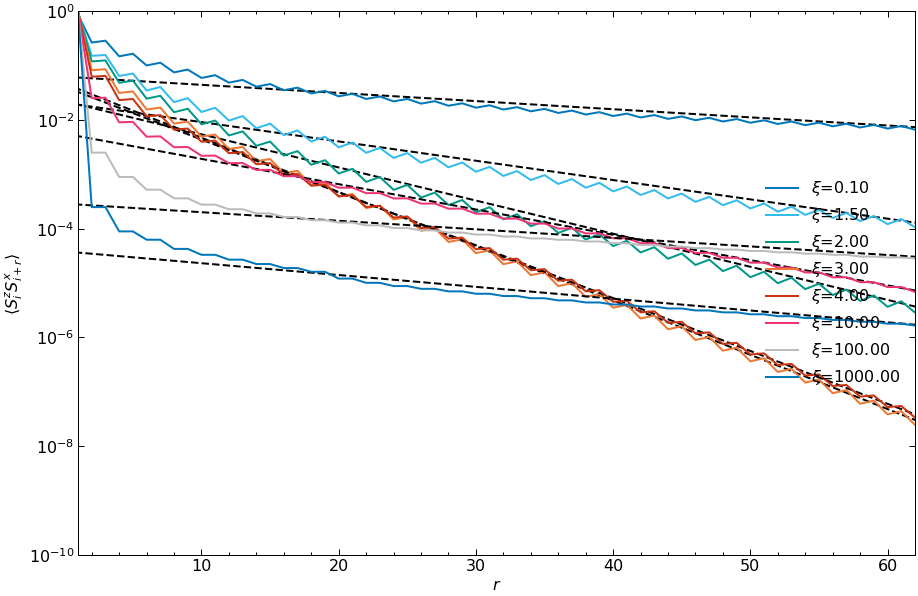

In [11]:
corrs, conn_corrs = cal_correlation(psis_b50_L100)
zeta_fit_b50_L100 = fit_conn_corr(conn_corrs)

<Sx> = -0.015223810463888501
<Sx> = -0.00020888147608168206
<Sx> = -5.082796645067278e-05
<Sx> = -2.042562212686838e-05
<Sx> = -3.311607674771899e-05
<Sx> = -6.639171380051767e-06
<Sx> = -2.4824586275506988e-09
<Sx> = -3.0808688933348094e-15
<Sx> = -2.1316282072803006e-14


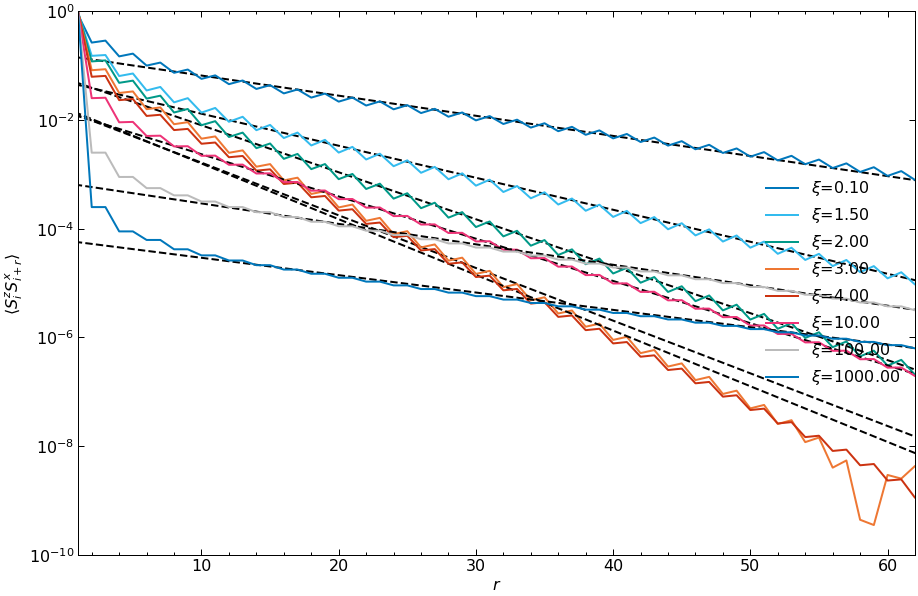

<Sx> = -0.00650726345428182
<Sx> = -6.733543709365464e-05
<Sx> = -2.3630543376507163e-06
<Sx> = -7.095692983183355e-07
<Sx> = -6.920705644564151e-06
<Sx> = -1.224983216696618e-06
<Sx> = 1.9235024684149948e-10
<Sx> = 1.149080830487037e-14
<Sx> = -2.0922708010573388e-11


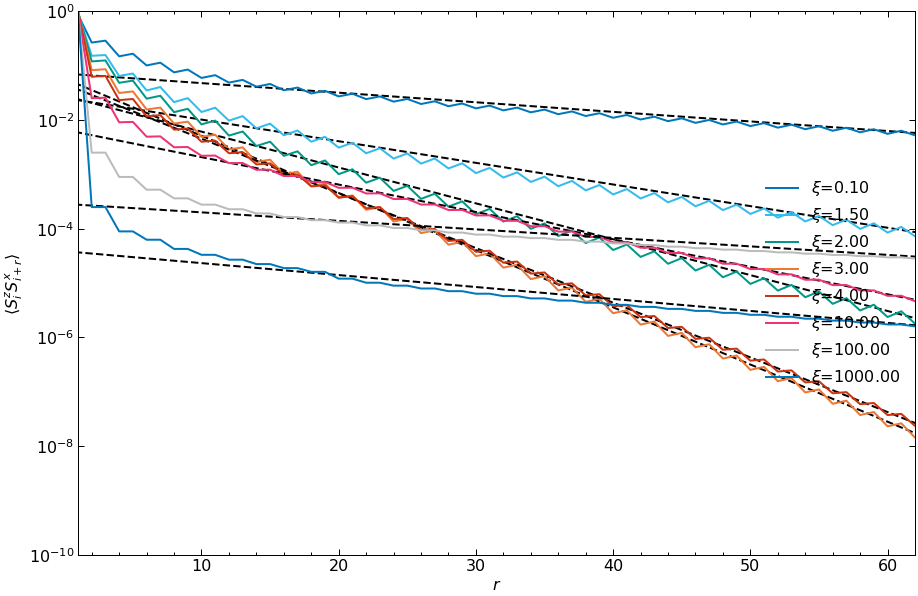

<Sx> = -0.004451572637136747
<Sx> = -1.8183026858215046e-05
<Sx> = -3.673174945734159e-07
<Sx> = -1.8092592504737048e-07
<Sx> = -6.668292318556118e-06
<Sx> = -1.171494322438349e-06
<Sx> = -1.038284766496922e-08
<Sx> = 1.7708057242771247e-14
<Sx> = -2.4079405136490095e-11


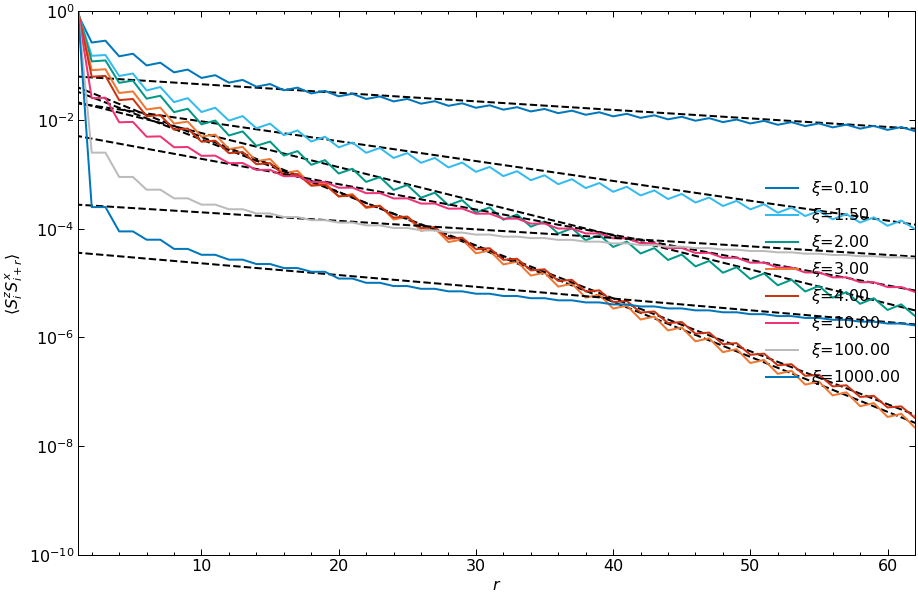

<Sx> = -0.003446144487008751
<Sx> = -1.4461094402774127e-05
<Sx> = -2.0503307354702294e-07
<Sx> = -1.7828768419784514e-07
<Sx> = -6.667845789676274e-06
<Sx> = -2.081050602398271e-06
<Sx> = 2.0479215656621363e-08
<Sx> = -2.1505019986989282e-13
<Sx> = 1.1435297153639112e-14


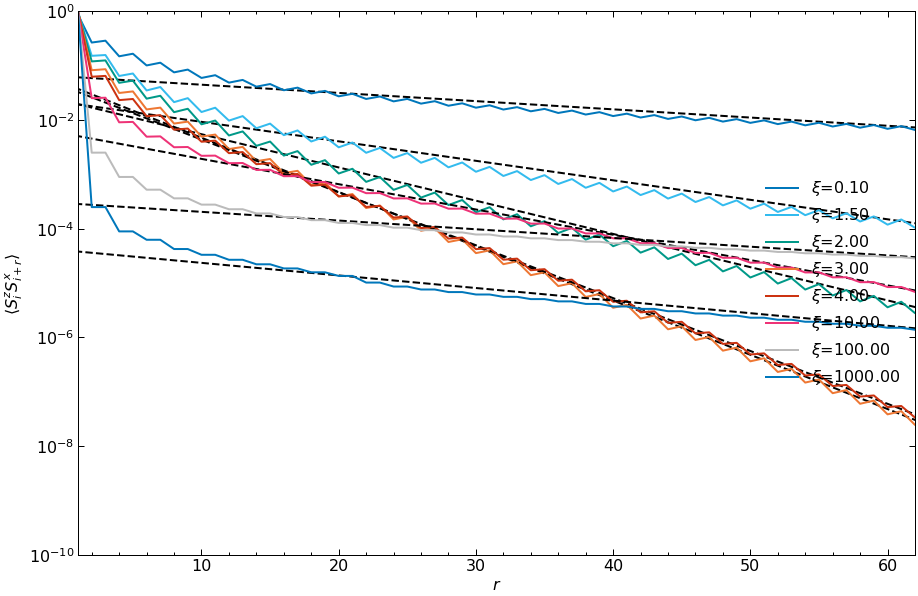

<Sx> = -0.0026691763300155658
<Sx> = -1.4653695397860711e-05
<Sx> = -2.436856478271743e-07
<Sx> = -1.7828771914363273e-07
<Sx> = -6.6678457457808316e-06
<Sx> = -2.9544430126815513e-06
<Sx> = 2.082544414694354e-10
<Sx> = -1.5189672436521917e-14
<Sx> = 7.716050021144838e-15


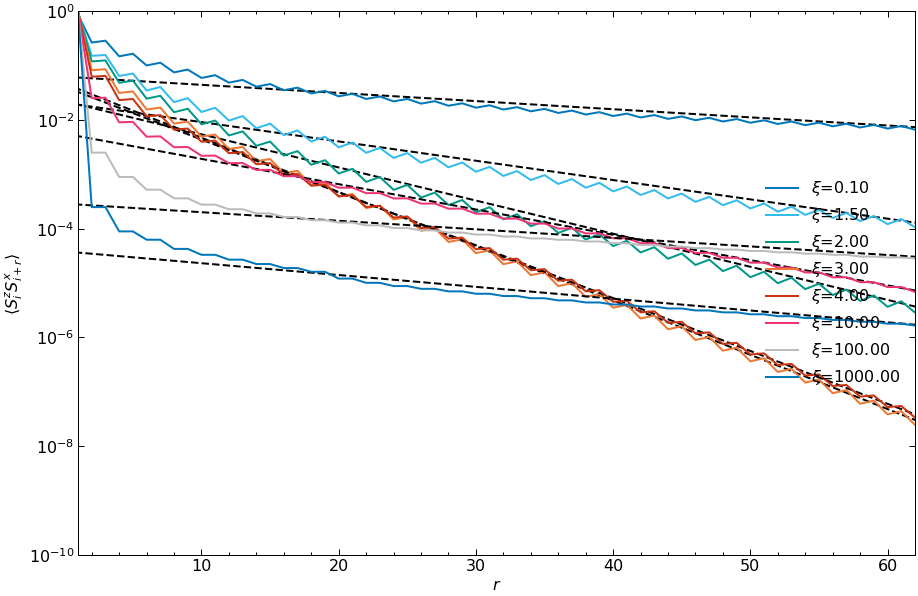

<Sx> = -0.0026691763295886677
<Sx> = -1.4653695405618394e-05
<Sx> = -2.0449175119896523e-07
<Sx> = -1.7828771628480844e-07
<Sx> = -6.667845759866786e-06
<Sx> = -3.016412035150573e-06
<Sx> = -1.2040440866556423e-10
<Sx> = -6.2727600891321345e-15
<Sx> = 2.4424906541753444e-15


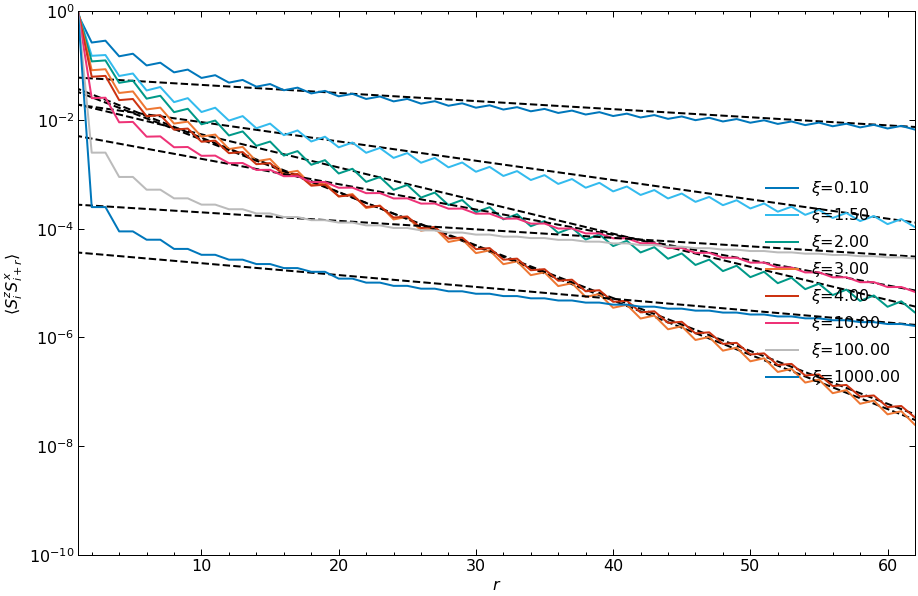

<Sx> = -0.002669176330098333
<Sx> = -1.4653695415611269e-05
<Sx> = -2.3407483940030005e-07
<Sx> = -1.7828769689753887e-07
<Sx> = -6.667845780870818e-06
<Sx> = -2.7988608832796302e-06
<Sx> = -2.199622956000624e-09
<Sx> = -2.3037127760971998e-14
<Sx> = 4.884981308350689e-15


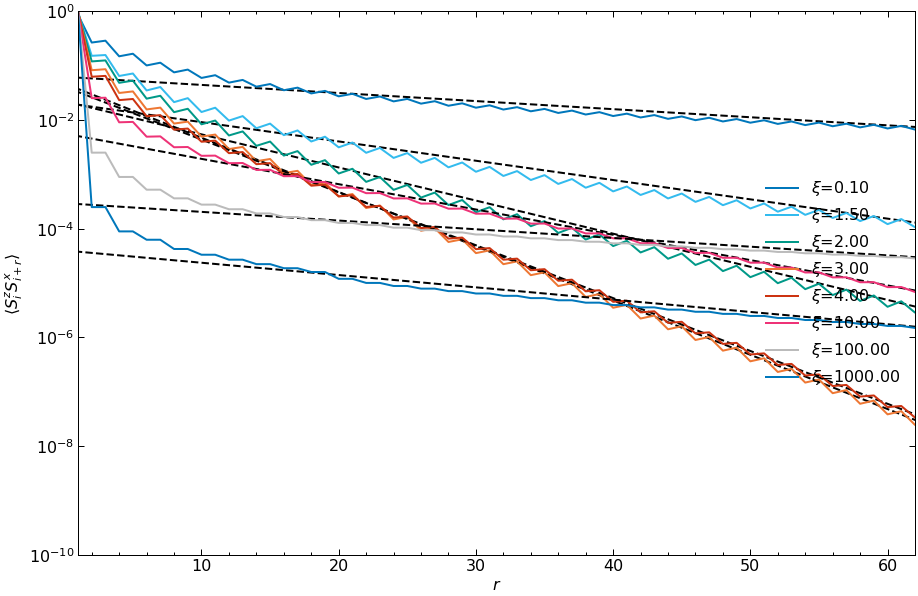

In [12]:
psis_b10_L100 = load_dict('data/models/psis_b10')
psis_b20_L100 = load_dict('data/models/psis_b20')
psis_b25_L100 = load_dict('data/models/psis_b25')
psis_b30_L100 = load_dict('data/models/psis_b30')
psis_b40_L100 = load_dict('data/models/psis_b40')
psis_b50_L100 = load_dict('data/models/psis_b50')
psis_b60_L100 = load_dict('data/models/psis_b60')
psis_b70_L100 = load_dict('data/models/psis_b70')
corrs, conn_corrs = cal_correlation(psis_b10_L100)
zeta_fit_b10_L100 = fit_conn_corr(conn_corrs)
corrs, conn_corrs = cal_correlation(psis_b20_L100)
zeta_fit_b20_L100 = fit_conn_corr(conn_corrs)
corrs, conn_corrs = cal_correlation(psis_b30_L100)
zeta_fit_b30_L100 = fit_conn_corr(conn_corrs)
corrs, conn_corrs = cal_correlation(psis_b40_L100)
zeta_fit_b40_L100 = fit_conn_corr(conn_corrs)
corrs, conn_corrs = cal_correlation(psis_b50_L100)
zeta_fit_b50_L100 = fit_conn_corr(conn_corrs)
corrs, conn_corrs = cal_correlation(psis_b60_L100)
zeta_fit_b60_L100 = fit_conn_corr(conn_corrs)
corrs, conn_corrs = cal_correlation(psis_b70_L100)
zeta_fit_b70_L100 = fit_conn_corr(conn_corrs)

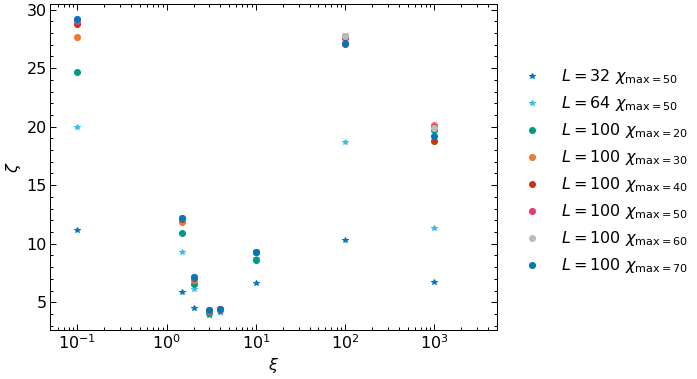

In [13]:
plt.figure(figsize=(8,6))
xis_fit = [0.1, 1.5, 2.0, 3.0, 4.0, 10, 1e2, 1e3]
plt.plot(xis_fit, zeta_fit_b50_L32, '*', label=r'$L=32$ $\chi_{\max = 50}$')
plt.plot(xis_fit, zeta_fit_b50_L64, '*', label=r'$L=64$ $\chi_{\max = 50}$')

plt.plot(xis_fit, zeta_fit_b20_L100, 'o', label=r'$L=100$ $\chi_{\max = 20}$')
plt.plot(xis_fit, zeta_fit_b30_L100, 'o', label=r'$L=100$ $\chi_{\max = 30}$')
plt.plot(xis_fit, zeta_fit_b40_L100, 'o', label=r'$L=100$ $\chi_{\max = 40}$')
plt.plot(xis_fit, zeta_fit_b50_L100, 'o', label=r'$L=100$ $\chi_{\max = 50}$')
plt.plot(xis_fit, zeta_fit_b60_L100, 'o', label=r'$L=100$ $\chi_{\max = 60}$')
plt.plot(xis_fit, zeta_fit_b70_L100, 'o', label=r'$L=100$ $\chi_{\max = 70}$')
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\zeta$")
plt.xscale("log")
plt.xlim(5e-2, 5e3)
plt.legend(bbox_to_anchor=(1.01, 0.85))
plt.savefig('plot/zeta_xi.png', dpi=120, transparent=True)

<Sx> = -0.0026691763300155658
<Sx> = -1.4653695397860711e-05
<Sx> = -2.436856478271743e-07
<Sx> = -1.7828771914363273e-07
<Sx> = -6.6678457457808316e-06
<Sx> = -2.9544430126815513e-06
<Sx> = 2.082544414694354e-10
<Sx> = -1.5189672436521917e-14
<Sx> = 7.716050021144838e-15


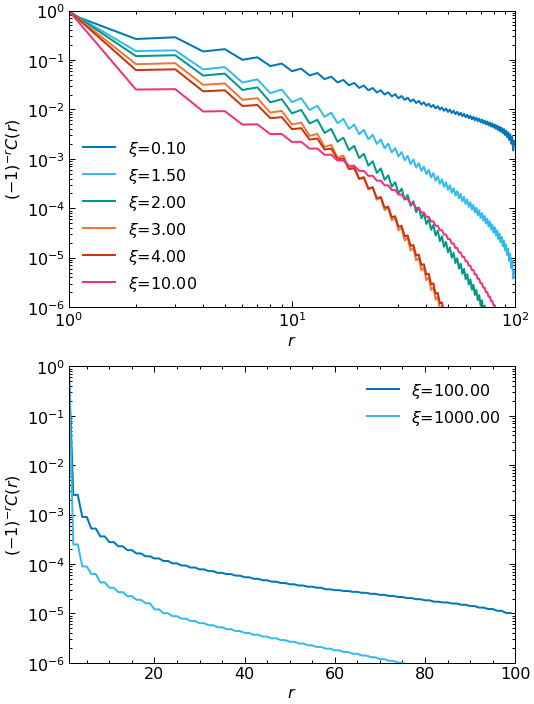

In [14]:
# plot the correlations
corrs, conn_corrs = cal_correlation(psis_b50_L100)
fig, axs = plt.subplots(2, 1, figsize=(8,12))
for xi in sorted(conn_corrs.keys()):
    if xi not in [1e2, 1e3, 1e4]:
        axs[0].plot(np.abs(conn_corrs[xi]), label=r"$\xi$={xi:.2f}".format(xi=xi))
    if xi in [1e2, 1e3]:
        axs[1].plot(np.abs(conn_corrs[xi]), label=r"$\xi$={xi:.2f}".format(xi=xi))
axs[0].set_xlabel("$r$")
axs[1].set_xlabel("$r$")
axs[0].loglog()
axs[1].set_yscale("log")
axs[0].set_ylabel(r"$(-1)^{-r}C(r)$")
axs[1].set_ylabel(r"$(-1)^{-r}C(r)$")
axs[0].legend(loc='best')
axs[1].legend(loc='best')
axs[0].set_ylim(1e-6,1)
axs[0].set_xlim(1,100)
axs[1].set_xlim(1,100)
axs[1].set_ylim(1e-6,1)
plt.savefig('plot/correlation_exp.png', dpi=120, transparent=True)

<Sx> = -0.0026691763300155658
<Sx> = -1.4653695397860711e-05
<Sx> = -2.436856478271743e-07
<Sx> = -1.7828771914363273e-07
<Sx> = -6.6678457457808316e-06
<Sx> = -2.9544430126815513e-06
<Sx> = 2.082544414694354e-10
<Sx> = -1.5189672436521917e-14
<Sx> = 7.716050021144838e-15


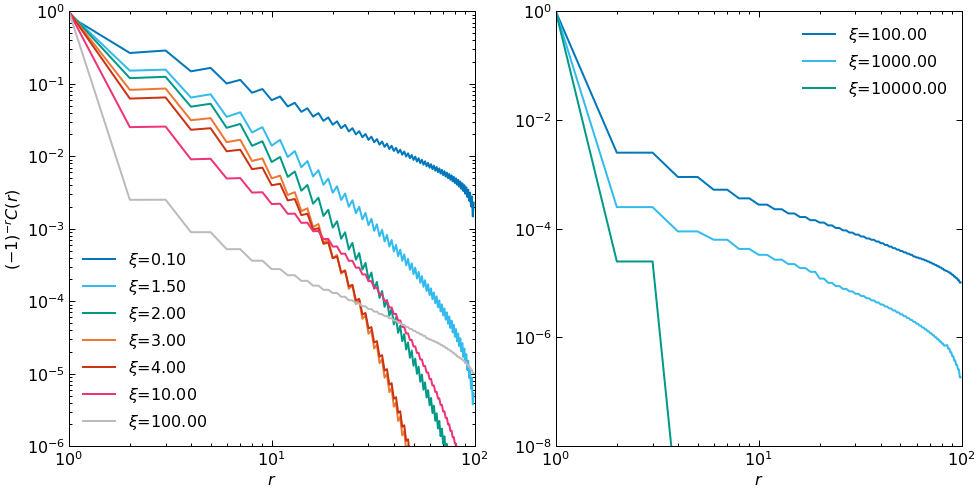

In [15]:
# plot the correlations
corrs, conn_corrs = cal_correlation(psis_b50_L100)
fig, axs = plt.subplots(1, 2, figsize=(16,8))
for xi in sorted(conn_corrs.keys()):
    if xi not in [1e3, 1e4]:
        axs[0].plot(np.abs(conn_corrs[xi]), label=r"$\xi$={xi:.2f}".format(xi=xi))
    if xi in [1e2, 1e3, 1e4]:
        axs[1].plot(np.abs(conn_corrs[xi]), label=r"$\xi$={xi:.2f}".format(xi=xi))
axs[0].set_xlabel("$r$")
axs[1].set_xlabel("$r$")
axs[0].loglog()
axs[1].loglog()
axs[0].set_ylabel(r"$(-1)^{-r}C(r)$")
axs[0].legend(loc='best')
axs[1].legend(loc='best')
axs[0].set_ylim(1e-6,1)
axs[0].set_xlim(1,100)
axs[1].set_xlim(1,100)
axs[1].set_ylim(1e-8,1)
plt.savefig('plot/correlation_loglog.png', dpi=120, transparent=True)